In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro

In [2]:
data = pd.read_csv('credit_train.csv',encoding = 'cp1251', sep= ';' )

In [3]:
data['credit_sum'] = data['credit_sum'].str.replace(',', '.').astype(float)
#привожу credit_sum к одному типу

In [6]:
data.describe()

,client_id,age,credit_sum,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170746.000000,170743.000000,170744.000000,170746.000000,170746.000000,170741.000000,161516.000000,161516.000000,170746.000000
mean,85373.500000,36.497262,26095.097541,10.980749,1.323900,40138.596149,2.107308,0.046070,0.176028
std,49290.268869,10.546044,16234.874095,3.536698,0.235813,25044.373992,1.777128,0.211548,0.380845
min,1.000000,18.000000,2736.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42687.250000,28.000000,14908.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85373.500000,34.000000,21229.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128059.750000,43.000000,32068.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,200000.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


In [7]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  object 
 2   age                   170743 non-null  float64
 3   marital_status        170743 non-null  object 
 4   job_position          170746 non-null  object 
 5   credit_sum            170744 non-null  float64
 6   credit_month          170746 non-null  int64  
 7   tariff_id             170746 non-null  float64
 8   score_shk             170739 non-null  object 
 9   education             170741 non-null  object 
 10  living_region         170554 non-null  object 
 11  monthly_income        170741 non-null  float64
 12  credit_count          161516 non-null  float64
 13  overdue_credit_count  161516 non-null  float64
 14  open_account_flg      170746 non-null  int64  
dtype

In [9]:
data['overdue_credit_count'].value_counts()

overdue_credit_count
0.0    154135
1.0      7326
2.0        50
3.0         5
Name: count, dtype: int64

In [10]:
data['credit_count'].value_counts()

credit_count
1.0     45279
2.0     36998
0.0     25806
3.0     23918
4.0     14113
5.0      7543
6.0      3915
7.0      1962
8.0      1007
9.0       476
10.0      220
11.0      129
12.0       74
13.0       33
14.0       15
15.0       13
17.0        5
16.0        4
19.0        3
18.0        2
21.0        1
Name: count, dtype: int64

In [11]:
data['credit_count'].median()

2.0

In [12]:
data['overdue_credit_count'].fillna(0,inplace = True)

In [13]:
data['overdue_credit_count'].value_counts()

overdue_credit_count
0.0    163365
1.0      7326
2.0        50
3.0         5
Name: count, dtype: int64

In [14]:
data['credit_count'].fillna(data['credit_count'].median(),inplace = True)

In [15]:
data['credit_count'].value_counts()

credit_count
2.0     46228
1.0     45279
0.0     25806
3.0     23918
4.0     14113
5.0      7543
6.0      3915
7.0      1962
8.0      1007
9.0       476
10.0      220
11.0      129
12.0       74
13.0       33
14.0       15
15.0       13
17.0        5
16.0        4
19.0        3
18.0        2
21.0        1
Name: count, dtype: int64

In [16]:
data.dropna(inplace= True)

In [17]:
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
7,8,F,26.0,UNM,SPC,47878.0,10,1.1,"0,512525",GRD,МОСКОВСКАЯ ОБЛ,60000.0,3.0,0.0,0
9,10,F,32.0,UNM,SPC,26268.0,10,1.1,"0,465026",GRD,КРАЙ СТАВРОПОЛЬСКИЙ,39500.0,7.0,0.0,0
10,11,M,26.0,MAR,SPC,16793.0,14,1.0,"0,445430",SCH,САНКТ-ПЕТЕРБУРГ,36000.0,2.0,0.0,0
12,13,M,37.0,MAR,SPC,42289.0,10,1.6,"0,691609",SCH,ОБЛ АРХАНГЕЛЬСКАЯ,70000.0,1.0,0.0,0
13,14,M,43.0,MAR,INP,57567.0,10,1.1,"0,341164",GRD,ХАНТЫ-МАНСИЙСКИЙ АО,60000.0,7.0,0.0,0


In [18]:
data.describe()

,client_id,age,credit_sum,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000,170543.000000
mean,85380.561143,36.499845,26093.671464,10.980990,1.323910,40136.940508,2.101728,0.043573,0.176237
std,49287.246838,10.547081,16233.183098,3.537248,0.235824,25046.924003,1.728883,0.205973,0.381023
min,8.000000,18.000000,2736.000000,3.000000,1.000000,5000.000000,0.000000,0.000000,0.000000
25%,42701.500000,28.000000,14908.000000,10.000000,1.100000,25000.000000,1.000000,0.000000,0.000000
50%,85377.000000,34.000000,21229.000000,10.000000,1.320000,35000.000000,2.000000,0.000000,0.000000
75%,128066.500000,43.000000,32068.000000,12.000000,1.600000,50000.000000,3.000000,0.000000,0.000000
max,170746.000000,71.000000,200000.000000,36.000000,1.960000,950000.000000,21.000000,3.000000,1.000000


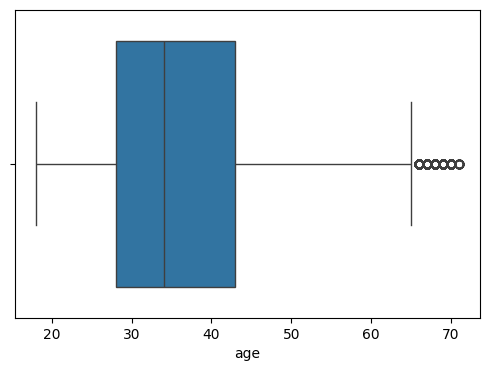

In [19]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['age'])
plt.show()

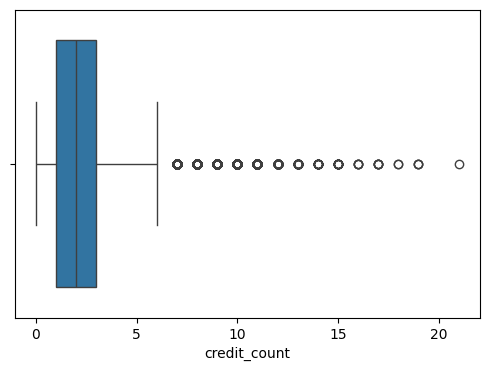

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=data['credit_count'])
plt.show()

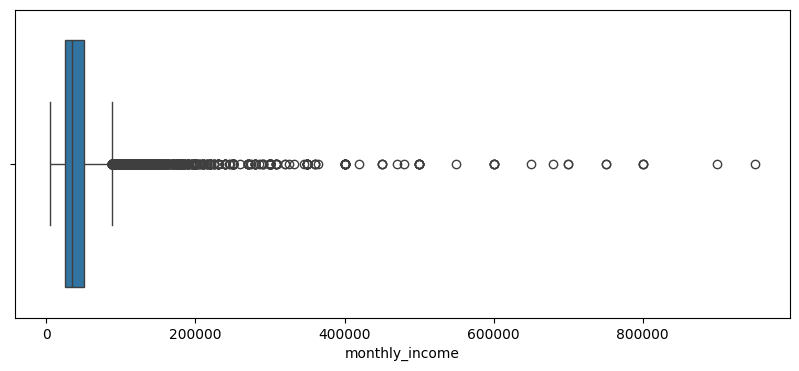

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['monthly_income'])
plt.show()

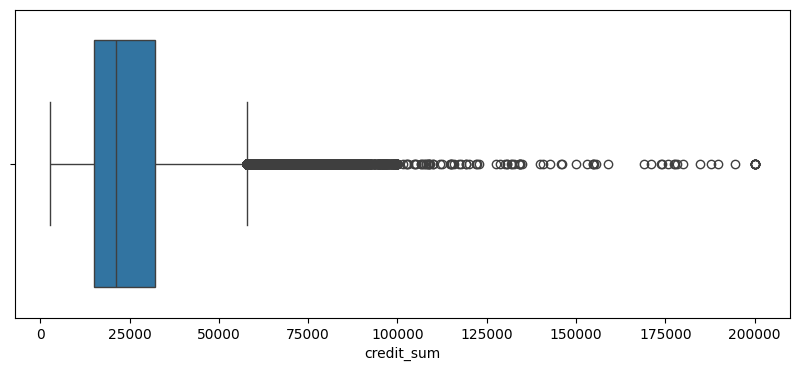

In [22]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=data['credit_sum'])
plt.show()

In [23]:
data.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [24]:
data.groupby(["marital_status", "gender"], as_index=False)["client_id"].count()
#кол-во клиентов в зависимости от пола и семейного положения

,marital_status,gender,client_id
0,CIV,F,2507
1,CIV,M,1688
2,DIV,F,11697
3,DIV,M,5264
4,MAR,F,44775
5,MAR,M,49063
6,UNM,F,26440
7,UNM,M,25639
8,WID,F,3188
9,WID,M,282


In [25]:
df = data.groupby(["living_region"], as_index=False)["client_id"].count()

In [26]:
df.sort_values(by='client_id',ascending = False)

,living_region,client_id
143,ОБЛ МОСКОВСКАЯ,12228
91,КРАСНОДАРСКИЙ КРАЙ,7456
246,САНКТ-ПЕТЕРБУРГ,5632
105,МОСКВА,5528
265,ТАТАРСТАН РЕСП,5187
...,...,...
68,КЕМЕРОВСКАЯ,1
72,КИРОВСКАЯ ОБЛАСТЬ,1
73,КОМИ,1
86,КРАЙ. КРАСНОЯРСКИЙ,1


In [27]:
data.groupby(["age", "gender"], as_index=False)["client_id"].count()
#кол-во клиентов по полу и возрасту

,age,gender,client_id
0,18.0,F,99
1,18.0,M,7
2,19.0,F,413
3,19.0,M,17
4,20.0,F,683
...,...,...,...
103,69.0,M,53
104,70.0,F,99
105,70.0,M,42
106,71.0,F,23


In [28]:
df_tariff = data.groupby(["age", "gender","tariff_id"], as_index=False)["client_id"].count()

In [29]:
df_tariff[(df_tariff['age'] == 25) & (df_tariff['gender'] == 'F')]
#смотрим какой кредит брали женщины в возрасте 25 лет

,age,gender,tariff_id,client_id
246,25.0,F,1.00,35
247,25.0,F,1.10,968
248,25.0,F,1.16,50
249,25.0,F,1.17,16
250,25.0,F,1.18,1
251,25.0,F,1.19,32
252,25.0,F,1.20,21
253,25.0,F,1.21,10
254,25.0,F,1.22,4
255,25.0,F,1.23,10


In [30]:
data[['age','tariff_id','credit_sum', 'credit_month']].corr()

,age,tariff_id,credit_sum,credit_month
age,1.000000,-0.109174,-0.096471,0.007131
tariff_id,-0.109174,1.000000,0.090635,-0.056277
credit_sum,-0.096471,0.090635,1.000000,0.228409
credit_month,0.007131,-0.056277,0.228409,1.000000


In [31]:
data.columns

Index(['client_id', 'gender', 'age', 'marital_status', 'job_position',
       'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education',
       'living_region', 'monthly_income', 'credit_count',
       'overdue_credit_count', 'open_account_flg'],
      dtype='object')

In [35]:
#проверка на нормальность  Тест Шапиро-Уилка
data_for_norm = data.select_dtypes(include= ['int64','float64'])

In [36]:
for i in data_for_norm.columns:
    statistic, p_value = shapiro(data[i])
    if p_value < 0.05:
        print('Отклоняем НО',p_value)
    else:
        print('Принимает',p_value)
    print('-----------')
    

Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------
Отклоняем НО 0.0
-----------


C:\Users\pavel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [62]:
from sklearn.preprocessing import MinMaxScaler

normalization = pd.DataFrame()  

scaler = MinMaxScaler()  # Создание экземпляра MinMaxScaler

for i in data_for_norm.columns:
    # Преобразование каждого столбца с помощью MinMaxScaler и добавление в  normalization
    column_data = data_for_norm[i].values.reshape(-1, 1)  # Преобразование в двумерный массив
    scaled_column = scaler.fit_transform(column_data)  # Применение MinMaxScaler к столбцу
    normalization[i] = scaled_column.flatten()  # Возвращает копию массива, свернутого в одно измерение.


In [63]:
normalization

,client_id,age,credit_sum,credit_month,tariff_id,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,0.000000,0.150943,0.228841,0.212121,0.104167,0.058201,0.142857,0.0,0.0
1,0.000012,0.264151,0.119292,0.212121,0.104167,0.036508,0.333333,0.0,0.0
2,0.000018,0.150943,0.071260,0.333333,0.000000,0.032804,0.095238,0.0,0.0
3,0.000029,0.358491,0.200508,0.212121,0.625000,0.068783,0.047619,0.0,0.0
4,0.000035,0.471698,0.277957,0.212121,0.104167,0.058201,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...
170538,0.999977,0.169811,0.314964,0.272727,0.104167,0.037037,0.285714,0.0,0.0
170539,0.999982,0.113208,0.075554,0.090909,0.625000,0.026455,0.047619,0.0,0.0
170540,0.999988,0.245283,0.125824,0.212121,0.333333,0.037037,0.047619,0.0,0.0
170541,0.999994,0.660377,0.017504,0.272727,0.104167,0.027513,0.095238,0.0,0.0


In [64]:
#Разделите данные на тренровачную и тестовую выборку.
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data,data['open_account_flg'],test_size=0.33, random_state=42 )